
=== Method: SMOTE ===
Original distribution: Counter({0: 15973, 1: 27})
Resampled distribution: Counter({0: 15973, 1: 15973})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3993
           1       1.00      0.57      0.73         7

    accuracy                           1.00      4000
   macro avg       1.00      0.79      0.86      4000
weighted avg       1.00      1.00      1.00      4000


=== Method: ADASYN ===
Original distribution: Counter({0: 15973, 1: 27})
Resampled distribution: Counter({0: 15973, 1: 15973})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3993
           1       1.00      0.43      0.60         7

    accuracy                           1.00      4000
   macro avg       1.00      0.71      0.80      4000
weighted avg       1.00      1.00      1.00      4000


=== Method: NEARMISS ===
Original distribution: Counter({0: 15973, 1: 27})
Resampled distr

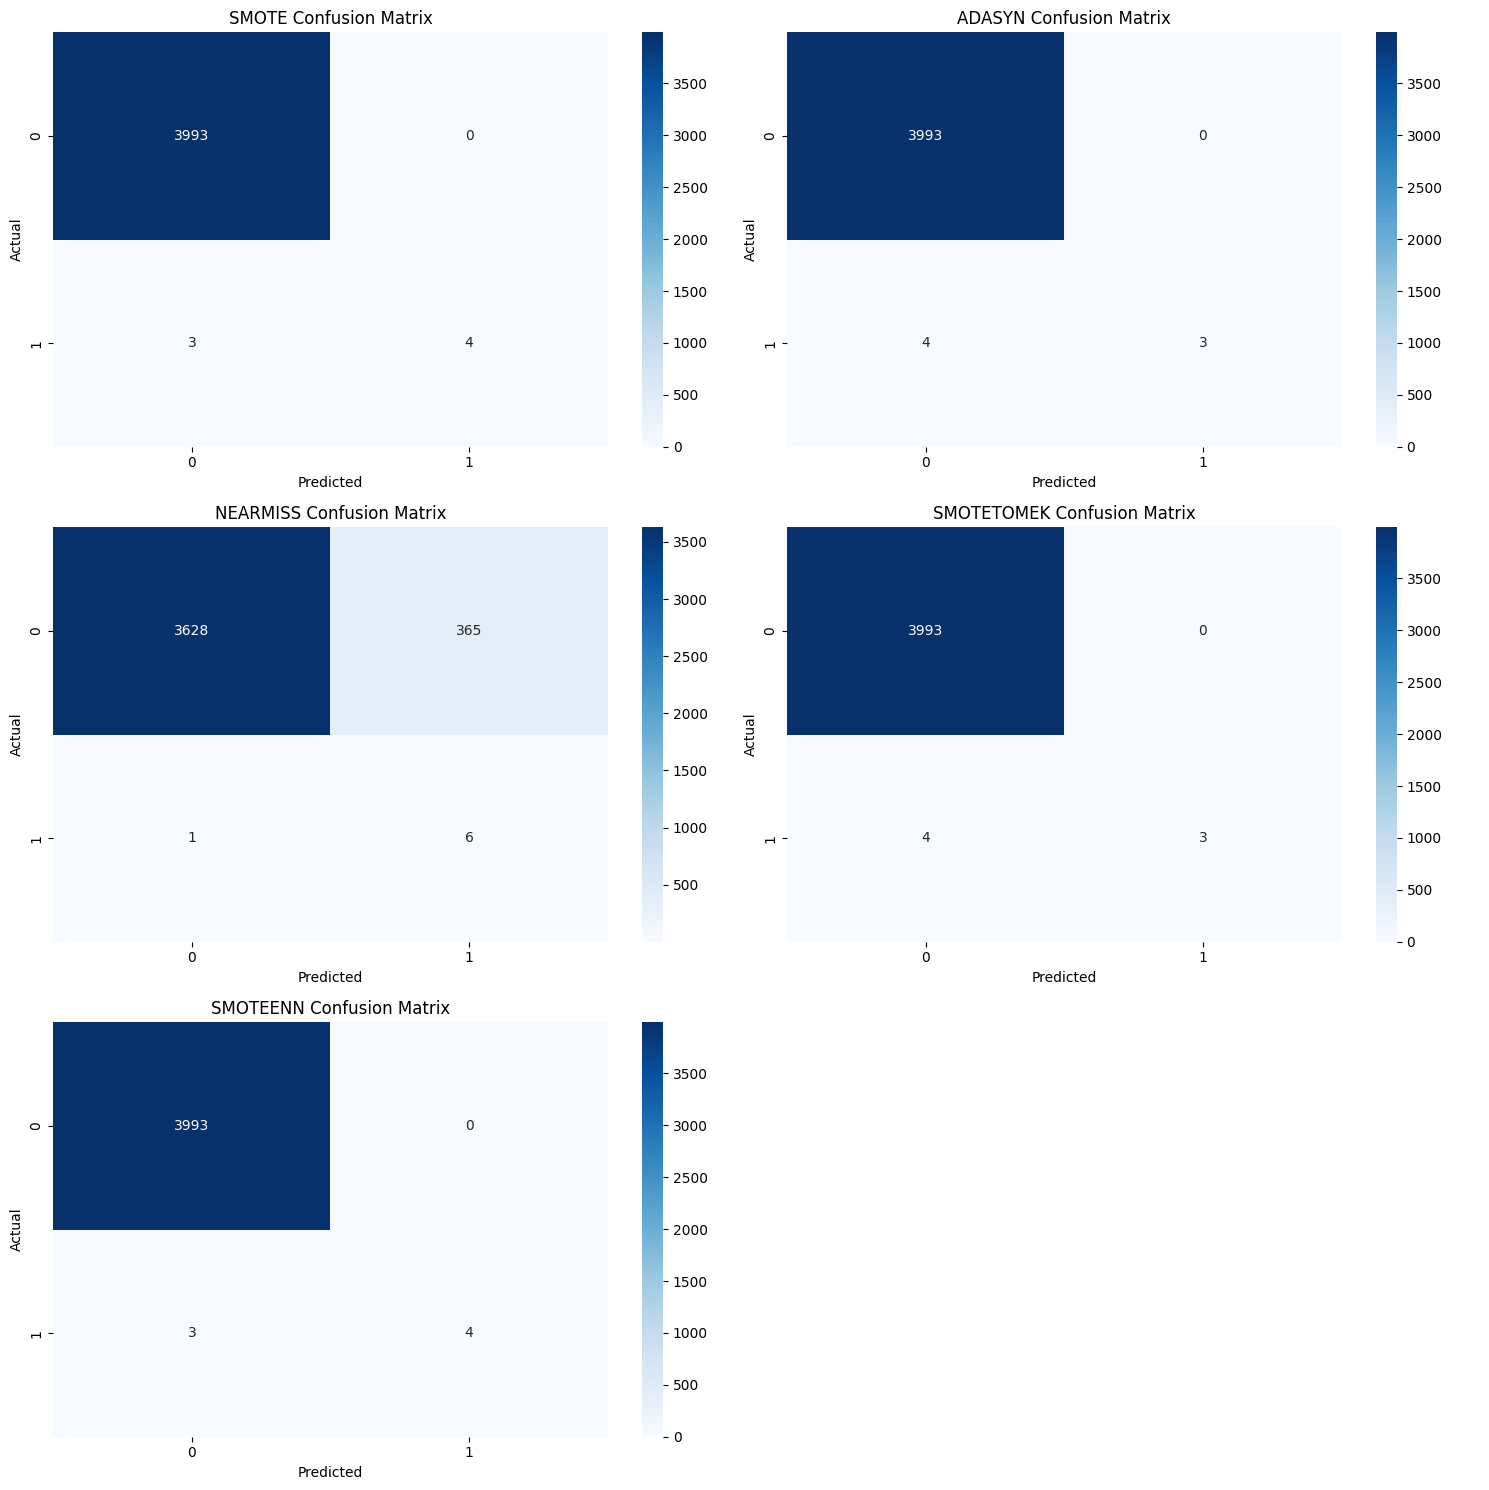

In [3]:
# 🧪 Resampling Method Comparison for Fraud Detection (Optimized)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from resampling import split_data, apply_resampling
from sklearn.preprocessing import StandardScaler

# ✅ Load a smaller sample of the dataset for faster processing
data = pd.read_csv('../data/creditcard.csv').sample(n=20000, random_state=42)

resampling_methods = ['SMOTE', 'ADASYN', 'NEARMISS', 'SMOTETOMEK', 'SMOTEENN']
results = {}

# ✅ Pre-split the sampled data to avoid repeating split in each loop
X_train_base, X_test, y_train_base, y_test = split_data(data)

for method in resampling_methods:
    print(f"\n=== Method: {method} ===")
    
    # Apply resampling on the same base split
    X_train, y_train = apply_resampling(X_train_base, y_train_base, method=method)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ✅ Use a smaller Random Forest for faster training
    clf = RandomForestClassifier(n_estimators=30, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test_scaled)

    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    results[method] = {
        'report': classification_report(y_test, y_pred, output_dict=True),
        'conf_matrix': cm
    }

# Plot all confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
for idx, method in enumerate(resampling_methods):
    cm = results[method]['conf_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"{method} Confusion Matrix")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide extra subplot if number of methods < number of axes
for i in range(len(resampling_methods), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
